#### Build the linear regression model using scikit learn in boston data to predict'Price' based on other dependent variable.
####  Here is the code to load the data:
#### import numpy as np
#### import pandas as pd
####  import scipy.stats as stats
#### import matplotlib.pyplot as plt
####  import sklearn
####  sklearn.datasets import load_boston
####  boston = load_boston()
#### bos = pd.DataFrame(boston.data)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

bos = load_boston()
data = pd.DataFrame(bos.data , columns=bos['feature_names'])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
data.shape

(506, 13)

In [3]:
data['Price'] = bos['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

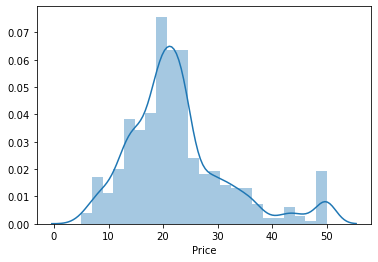

In [5]:
#plt.plot(data['Price'])
sns.distplot(data['Price'])

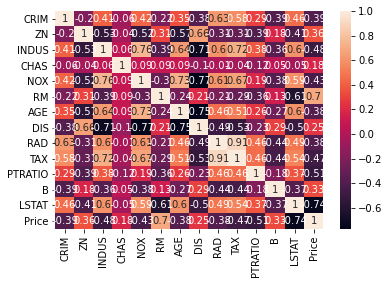

In [6]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr().round(2) , annot=True)

In [7]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

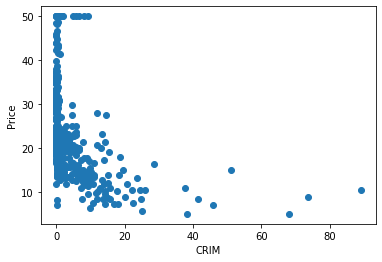

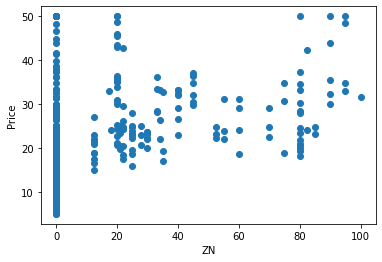

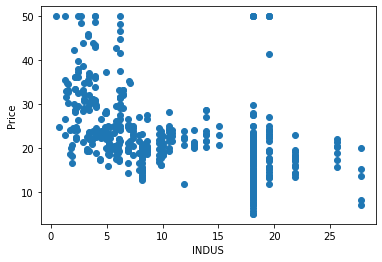

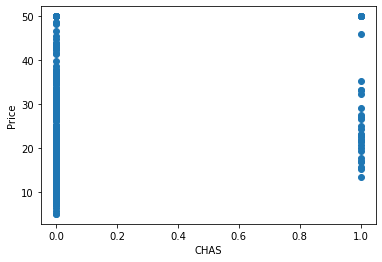

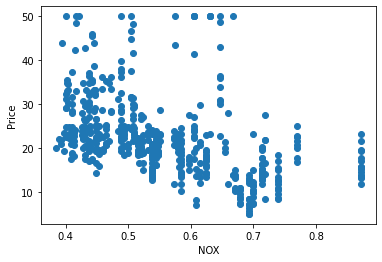

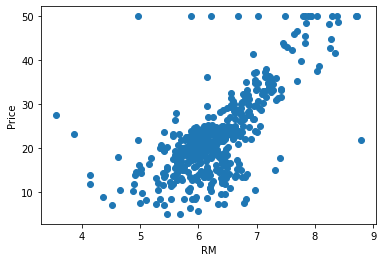

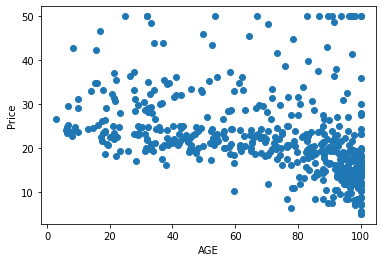

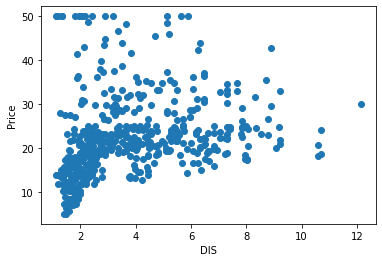

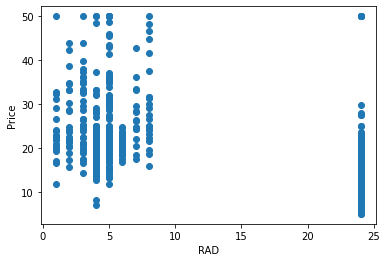

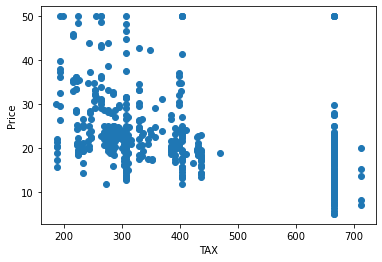

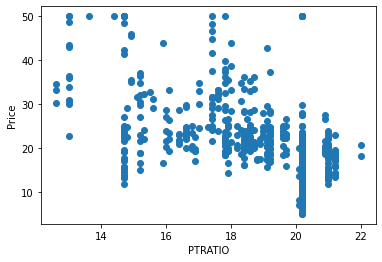

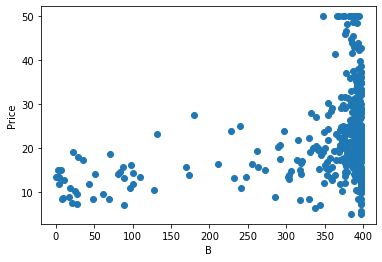

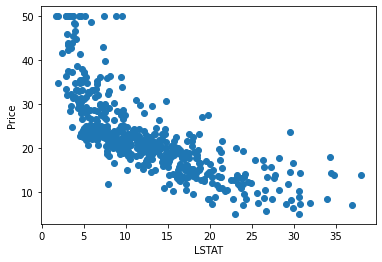

In [8]:
for col in x.columns:
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x , y ,test_size = 0.2 ,random_state = 5)

In [10]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(train_x,train_y)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score = r2_score(linear_reg.predict(train_x),train_y )
score

0.645609308191944

In [12]:
score = r2_score(linear_reg.predict(test_x),test_y)
score

0.7239358181605393